In [2]:
import sys
sys.path.insert(1, '../Utils/') # use this statement to add your custom modules to the python import PATH.
import numpy as np
import std_signals as ss #, unit_pulse_train
# from std_functions import dB_from_W, W_from_dB, P_R, calc_binary
import matplotlib.pyplot as plt

# Task 1
Summary: Plot sync pulse $m(t)$ defined as follows: 
$$sinc(x) = \frac{sin(x)}{x}$$\
$$m(t) = 2Bsinc(2\pi Bt)$$

Note: Specific pieces of code will be explained through comments only if required. You should be able to figure out most of it without much difficulty, if you are unable to understand any pre-defined function from a python module (eg: numpy, matplotlib), refer to their respective docs.

In [4]:
t1 = -0.5
t2 = 0.5
N = 7
B = N + 5
fs = 1000*B
ts = 1/fs
t = np.arange(t1, t2, ts)

 ### Matplotlib References:
 A Summary of the attributes listed under the pyplot module: [matplotlib.pyplot summary](https://matplotlib.org/stable/api/pyplot_summary.html)  
 The Line2D method docs provide a list of all the standard format properties which can be used in pyplot.plot: [matplotlib.lines.Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_color)  
 A quick reference about available colors in Matplotlib: [Matplotlib Name Colors Reference](https://matplotlib.org/stable/gallery/color/named_colors.html)  
 The doc page of pyplot.plot examples: [matplotlib.pyplot.plot Examples](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)  
 A reference about spawning the figlegend method to spawn plot legends: [matplotlib.pyplot.figlegend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figlegend.html#matplotlib.pyplot.figlegend)  
 
 ### Numpy References:
 A cool article about the use of broadcasting for carrying out numerical operations with arrays: [1.4.2. Numerical operations on arrays
](https://scipy-lectures.org/intro/numpy/operations.html)

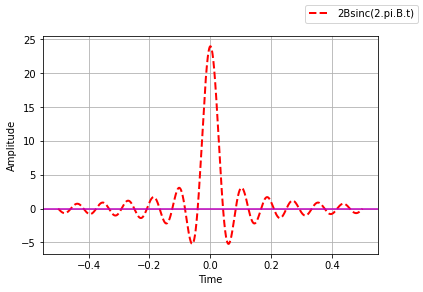

In [5]:
sinc_x = 2*B*ss.sinc(2*np.pi*B*t)
# You can use np.sinc too. But then remember that pi won't be required since it is already defined in its definition. Since
# this is confusing some times, I prefer to define my own sinc. You can do whatever feels more convenient to you.
plt.plot(t, sinc_x, color='red', linestyle='dashed', linewidth=2, label='2Bsinc(2.pi.B.t)')
# Labels can be set by fig.set_label() as well.
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='m')
plt.figlegend()
plt.show()

# Task 2

Summary: $P_T = 1 W$, $G_T = 10 dB$, $G_R = 0 dB$, $f_1 = 900MHz$, $f_2 = 2.4GHz$, $d =$ np.arange(100, 5000, 500)  
$$P_R = \frac{P_T G_T G_R \lambda^2}{(4 \pi d)^2}$$  
$$A(dB) = 10log_{10}(A (W))$$  
$$A(dBm) = 10log_{10}\left(\frac{A (W)}{1 mW}\right)$$

In [6]:
# Always use functional programming whenever possible. This will help you a ton during the lab tests and future lab sessions, esp. when the 
# question refers to a another question from a lab session which predates the current. Therefore, it will save you the effort of finding the 
# right pieces of codes when it really matters. Though, I have declared these function here, I have stored them in the Utils/ folder which was
# imported in the first cell of this notebook. The file where these are stored is Utils/std_functions.py. It is recommended to do the same for
# functions related to fft, dft, etc. (in case scipy is not allowed). The import statement for the functions below was commented to allow these
# definitions to work.

def P_R(P_T, G_T, G_R, L, d):
    P_R = np.zeros_like(d)
    # Check numpy array broadcasting.
    P_R[:] = P_T*G_T*G_R*(L**2)/(4*np.pi*d[:])**2
    return P_R

def dB_from_W(P, mode):
    Po = 1 # dB
    if mode == 1:
        Po = 0.001 # dBm
    return (10*np.log10(P/Po))

def W_from_dB(P, mode):
    Po=1 # from dB
    if mode == 1:
        Po = 0.001 # from dBm
    return (Po*np.power(10, P/10))

In [7]:
c = 3*10**8 # m/s
f1 = 900*10**6 # MHz
f2 = 2.4*10**9 # GHz
d1 = 100 # m
d2 = 5000 # m
L1 = c/f1
L2 = c/f2
d_step = 500 # m
d = np.arange(d1, d2, d_step, dtype=np.float64)
Pt = 1 # W
Gt = W_from_dB(10, 0)
Gr = W_from_dB(0, 0)

P_R1 = P_R(Pt, Gt, Gr, L1, d)
P_R2 = P_R(Pt, Gt, Gr, L2, d)
# convert to dBm
P_R1 = dB_from_W(P_R1, 1)
P_R2 = dB_from_W(P_R2, 1)

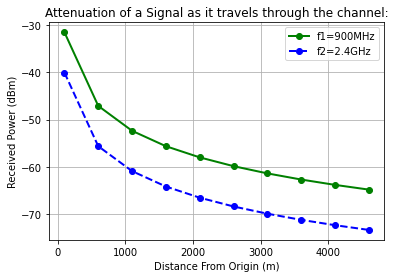

In [8]:
plt.plot(d, P_R1, 'go-', d, P_R2, 'bo--', linewidth=2) # go- means, color='green', marker='o', linestyle='dashed'. Refer to the references for this method called
                                                       # property condensation in matplotlib. You can give a title to the graph and draw subplots just like matlab.
plt.xlabel('Distance From Origin (m)')
plt.ylabel('Received Power (dBm)')
plt.legend(['f1=900MHz','f2=2.4GHz'])
plt.title("Attenuation of a Signal as it travels through the channel:")
plt.grid(True, which="both")
plt.show()

# Task 3
Summary: Calculate a serial binary equivalent of your name using ord, chr, bin 

In [11]:
def calc_binary(str_):
    unicode = np.array([], dtype=int)
    binary = np.array([])
    bit_stream = ''
    for i in str_:
        unicode = np.append(unicode, ord(i))
        binary = np.append(binary, bin(unicode[-1]))
        bit_stream += binary[-1][2:] # remove the 0b in the front of the char sequence by array slicing.
    return unicode, binary, bit_stream    

In [12]:
name = "Your Name"
uni, bin_, bit_stream = calc_binary(name) 
# *_, bit_stream = calc_binary(name) # If using this. Uncomment the lines above and below.
print("Binary Values: ", bin_, "\n")
print("Bit Stream: ", bit_stream)

Binary Values:  ['0b1011001' '0b1101111' '0b1110101' '0b1110010' '0b100000' '0b1001110'
 '0b1100001' '0b1101101' '0b1100101'] 

Bit Stream:  10110011101111111010111100101000001001110110000111011011100101


# Task 4

You listen various tones (dial, ringing, busy) using a telephone. These tones are generated with a com-bination of sine wave of various frequency. The tone plan is based on ITU-T Standard recommendation.The dial tone is a continuous tone of the addition of the frequencies 350 and 440 Hz. The ringing tonecomprises frequencies of 440 and 480 Hz and a cadence of 2 seconds ON and 4 seconds OFF. The busytone has frequency components of 480 and 620 Hz and a cadence of one half second ON and one halfsecond OFF. Use this tone plan to generateBUSY TONE/DIAL TONE. Use a speaker to listenBUSY/DIAL TONE by applying command playsound. While generating the sinewave, mind its ampli-tude (take 0.1 volt).

In [15]:
# Required imports for the Task 4. 
# Install scipy and playsound if not done already.
from scipy.io import wavfile
from playsound import playsound as play

In [18]:
# Lets define a special vector to generate these signals. Since we want a sort of
# array of multipliers to zero out the signals at intervals in order to generate the 
# 2 or 4 sec gaps in tones. This is actually in fact a pulse train. A similar logic
# can be employed to create a square wave and a rect pulse.

def unit_pulse_train(T_start, T_stop, T_on, T_off, ts):
    # You can use an assert statement to throw an error in case Tstop > Tstart.
    # Suddenly changing the variable name casing pattern (i.e. using zzzYyy instead of zzz_yyy) is not a very good practice, but here goes:
    intervals = int((T_stop - T_start)/(T_on+T_off)) + 1 # Greatest Integer Function + 1.
    spi = int((T_on + T_off)/ts) # samples per interval
    spi_on = int(T_on/ts) # Samples per interval for which pulse is ON
    spi_off = int(T_off/ts) # ----------------||------------------- OFF
    N = int((T_stop - T_start)/ts)
    t = np.linspace(T_start, T_stop, N)
    unitPulseTrain = np.zeros_like(t)
    i = 0
    while(i < intervals):
        end = (i+1)*spi
        if end > N:
            end = end - end % int(N)
        unitPulseTrain[i*spi : i*spi + spi_on] = 1
        unitPulseTrain[i*spi + spi_on : end] = 0
        i += 1
    
    return unitPulseTrain, t

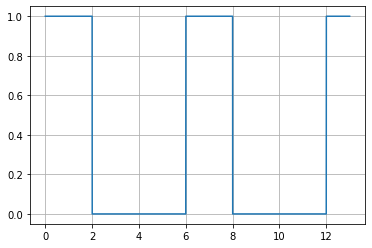

In [19]:
A = 0.1 # V, Amplitude
t1 = 0 # Start Time.
t2 = 13 # End Time.
fs = 2*620 # because 620Hz is max freq. encountered.
t_on = 2
t_off = 4
multiplier, t = unit_pulse_train(t1, t2, t_on, t_off, 1/fs)
plt.plot(t, multiplier)
plt.grid()
plt.show()

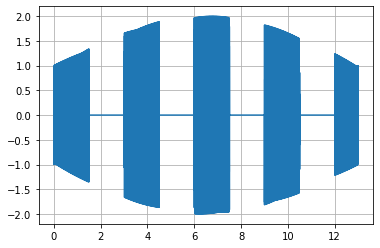

In [20]:
# Now we are all set for generating the required signals.
# Omitting the dial tone since it is straightforward.
## BUSY TONE
f1 = 440
f2 = 480
fs = 2*max(f1,f2)
t_on = 1.5
t_off = 1.5
multiplier, t = unit_pulse_train(t1, t2, t_on, t_off, 1/fs)
busy_tone = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
# Applying the ON and OFF cadence
busy_tone[:] = multiplier[:]*busy_tone[:]
plt.plot(t, busy_tone) # You will see a bizarre plot. It should become 
                       # uniform by increasing fs.
plt.grid()
plt.show()

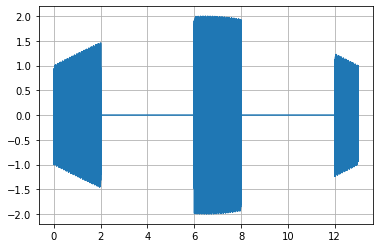

In [21]:
## Ringing Tone
f1 = 350
f2 = 440
fs = 2*max(f1,f2)
t_on = 2
t_off = 4
multiplier, t = unit_pulse_train(t1, t2, t_on, t_off, 1/fs)
ringing_tone = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
# Applying the ON and OFF cadence
ringing_tone[:] = multiplier[:]*ringing_tone[:]
plt.plot(t, ringing_tone) # You will see a bizarre plot. It should become 
                       # uniform by increasing fs.
plt.grid()
plt.show()

In [22]:
## Saving and Playing.
wavfile.write("busy_tone.wav", fs, busy_tone)
wavfile.write("ringing_tone.wav", fs, ringing_tone)
# playsound("busy_tone.wav")
# playsound("ringing_tone.wav")